In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d vijaykumar1799/face-mask-detection

Dataset URL: https://www.kaggle.com/datasets/vijaykumar1799/face-mask-detection
License(s): CC0-1.0
 98% 217M/222M [00:21<00:00, 27.2MB/s]
100% 222M/222M [00:21<00:00, 10.8MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-detection.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
import shutil

dataset_dir = '/content/Dataset'

keep_folders = ['with_mask', 'without_mask']

for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)

    if folder not in keep_folders:
        shutil.rmtree(folder_path)

print("Unwanted folders deleted, only the specified classes are kept.")

Unwanted folders deleted, only the specified classes are kept.


In [ ]:
!ls

Dataset  face-mask-detection.zip  images  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
with_mask_files = os.listdir('/content/Dataset/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['1070.png', '63.png', '1306.png', '2260.png', '163.png']
['1190.png', '907.png', '323.png', '1722.png', '2694.png']


In [ ]:
without_mask_files = os.listdir('/content/Dataset/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['1070.png', '63.png', '1306.png', '2260.png', '163.png']
['1190.png', '907.png', '323.png', '1722.png', '2694.png']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 2994
Number of without mask images: 2994


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# Create labels
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

2994
2994


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

5988
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

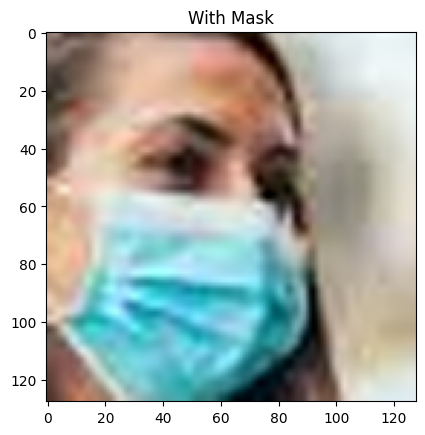

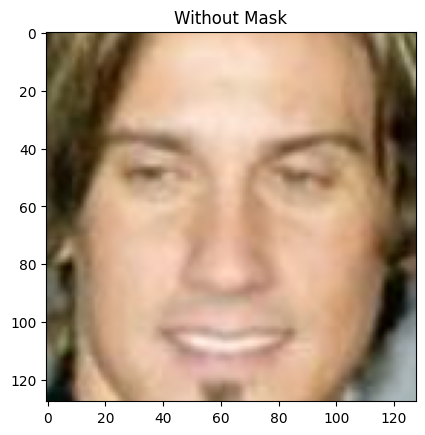

In [ ]:
# Displaying sample images
img_with_mask = mpimg.imread('/content/Dataset/with_mask/' + with_mask_files[0])
img_without_mask = mpimg.imread('/content/Dataset/without_mask/' + without_mask_files[1])
plt.imshow(img_with_mask)
plt.title("With Mask")
plt.show()
plt.axis()

plt.imshow(img_without_mask)
plt.title("Without Mask")
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# Convert images to numpy arrays
data = []
with_mask_path = '/content/Dataset/with_mask/'
for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

without_mask_path = '/content/Dataset/without_mask/'
for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

5988

array([[[144, 124, 113],
        [146, 126, 114],
        [153, 133, 123],
        ...,
        [233, 243, 245],
        [232, 242, 244],
        [232, 242, 244]],

       [[142, 122, 111],
        [142, 122, 112],
        [148, 128, 118],
        ...,
        [233, 243, 245],
        [232, 242, 244],
        [232, 242, 244]],

       [[135, 115, 105],
        [134, 114, 104],
        [133, 113, 104],
        ...,
        [232, 242, 244],
        [232, 242, 243],
        [231, 241, 243]],

       ...,

       [[ 79,  52,  41],
        [ 83,  55,  44],
        [ 89,  60,  50],
        ...,
        [225, 236, 239],
        [226, 236, 240],
        [227, 236, 240]],

       [[ 77,  51,  39],
        [ 80,  53,  42],
        [ 87,  58,  47],
        ...,
        [225, 236, 240],
        [227, 236, 241],
        [227, 236, 241]],

       [[ 76,  50,  38],
        [ 79,  52,  41],
        [ 85,  56,  46],
        ...,
        [225, 237, 241],
        [227, 236, 241],
        [228, 236, 242]]], dtype=uint8)
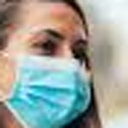

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(5988, 128, 128, 3)
(5988,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print("Train and test shapes:", X_train.shape, X_test.shape)

Train and test shapes: (4790, 128, 128, 3) (1198, 128, 128, 3)


In [ ]:
# Scaling the data
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

### Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)
datagen.fit(X_train_scaled)

In [ ]:
print("X_train original sample:", X_train[0])

X_train original sample: [[[107  75  64]
  [ 92  59  49]
  [ 69  36  29]
  ...
  [ 66  45  54]
  [ 65  44  52]
  [ 64  43  50]]

 [[105  73  62]
  [ 96  63  53]
  [ 74  41  34]
  ...
  [ 63  42  51]
  [ 64  43  52]
  [ 64  43  50]]

 [[101  69  59]
  [ 96  63  54]
  [ 78  45  40]
  ...
  [ 62  41  49]
  [ 63  42  50]
  [ 63  42  49]]

 ...

 [[120  85  61]
  [117  83  59]
  [119  85  62]
  ...
  [254 255 246]
  [253 253 244]
  [252 250 242]]

 [[116  86  63]
  [110  80  59]
  [116  87  67]
  ...
  [252 252 245]
  [251 250 244]
  [249 246 240]]

 [[114  87  68]
  [ 99  73  56]
  [107  83  66]
  ...
  [251 250 248]
  [251 250 248]
  [251 250 246]]]


In [ ]:
print("X_train scaled sample:", X_train_scaled[0])

X_train scaled sample: [[[0.41960784 0.29411765 0.25098039]
  [0.36078431 0.23137255 0.19215686]
  [0.27058824 0.14117647 0.11372549]
  ...
  [0.25882353 0.17647059 0.21176471]
  [0.25490196 0.17254902 0.20392157]
  [0.25098039 0.16862745 0.19607843]]

 [[0.41176471 0.28627451 0.24313725]
  [0.37647059 0.24705882 0.20784314]
  [0.29019608 0.16078431 0.13333333]
  ...
  [0.24705882 0.16470588 0.2       ]
  [0.25098039 0.16862745 0.20392157]
  [0.25098039 0.16862745 0.19607843]]

 [[0.39607843 0.27058824 0.23137255]
  [0.37647059 0.24705882 0.21176471]
  [0.30588235 0.17647059 0.15686275]
  ...
  [0.24313725 0.16078431 0.19215686]
  [0.24705882 0.16470588 0.19607843]
  [0.24705882 0.16470588 0.19215686]]

 ...

 [[0.47058824 0.33333333 0.23921569]
  [0.45882353 0.3254902  0.23137255]
  [0.46666667 0.33333333 0.24313725]
  ...
  [0.99607843 1.         0.96470588]
  [0.99215686 0.99215686 0.95686275]
  [0.98823529 0.98039216 0.94901961]]

 [[0.45490196 0.3372549  0.24705882]
  [0.43137255 

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
num_of_classes = 2
model = keras.Sequential([
    keras.layers.Input(shape=(128, 128, 3)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

In [ ]:
X_train_part, X_val, Y_train_part, Y_val = train_test_split(X_train_scaled, Y_train, test_size=0.1, random_state=2)

In [ ]:
history = model.fit(
    datagen.flow(X_train_part, Y_train_part, batch_size=32),
    validation_data=(X_val, Y_val),
    epochs=10,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


135/135 ━━━━━━━━━━━━━━━━━━━━ 30s 165ms/step - acc: 0.8425 - loss: 0.3554 - val_acc: 0.9582 - val_loss: 0.1439 - learning_rate: 0.0010
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 30s 119ms/step - acc: 0.9408 - loss: 0.1672 - val_acc: 0.9562 - val_loss: 0.1474 - learning_rate: 0.0010
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - acc: 0.9501 - loss: 0.1576 - val_acc: 0.9666 - val_loss: 0.1034 - learning_rate: 0.0010
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - acc: 0.9494 - loss: 0.1625 - val_acc: 0.9624 - val_loss: 0.0964 - learning_rate: 0.0010
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - acc: 0.9575 - loss: 0.1346 - val_acc: 0.9687 - val_loss: 0.0855 - learning_rate: 0.0010
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - acc: 0.9607 - loss: 0.1080 - val_acc: 0.9687 - val_loss: 0.0815 - learning_rate: 0.0010
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - acc: 0.9650 - loss: 0.1090 - val_acc: 0.9729 - val_loss: 0.0793 - learning_rate: 0.0

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9826 - loss: 0.0464
Test Accuracy = 0.9824708104133606


In [ ]:
# Plotting loss and accuracy
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

NameError: name 'plt' is not defined